# CO2 Mauna Loa Trend Analysis

We will analyze the CO2 Mauna Loa dataset (1958 - 2012) using regression techniques.  First we'll need to download the data from the oneDrive, and load it into python.

In [2]:
import numpy as np
import IPython.display as disp

co2 = np.loadtxt('../data/co2_mm_mlo.txt',usecols = (0,1,2,4))

print 'The size of the co2 dataset is {0}'.format(co2.shape)

The size of the co2 dataset is (654, 4)


What are the 7 columns?

In [3]:
print co2[0,0::]

[ 1958.        3.     1958.208   315.71 ]


The first column is year, the second is month, and the third is decimal year, and the fourth is the CO2 reading from Mauna Loa.

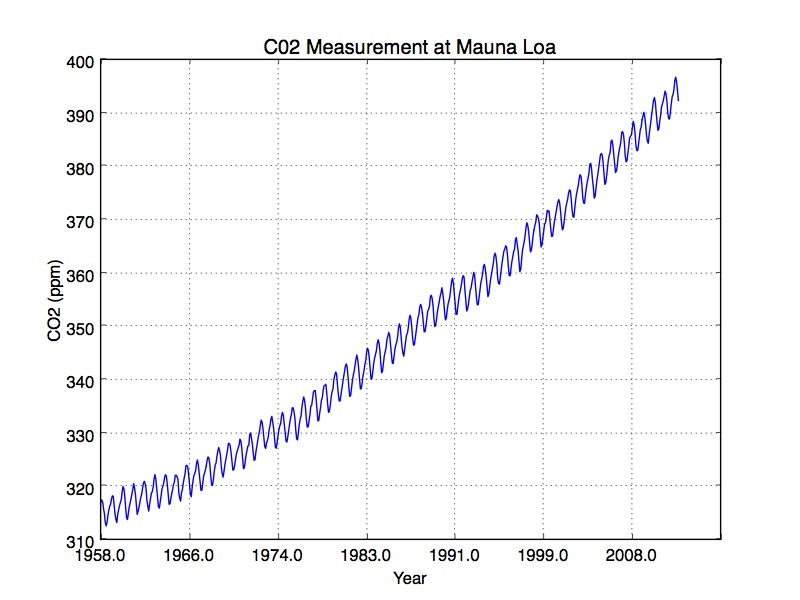

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(co2[:,3])
plt.xticks(np.arange(0,701,100),co2[::100,0])
plt.title('C02 Measurement at Mauna Loa')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../figures/co2.jpg')
plt.close()
image = disp.Image('../figures/co2.jpg')
disp.display(image)

Compute the trend, using linear regression and time as a predictor of the CO2 timeseries

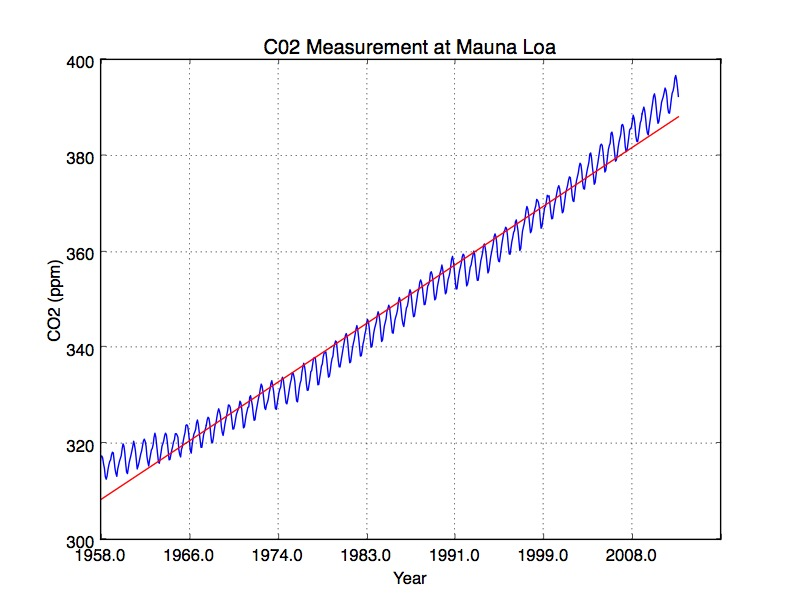

In [5]:
timeVector = np.arange(0,len(co2))

X = np.vstack((np.ones(len(co2)),timeVector)).T
Y = co2[:,3].T
coeffs = np.linalg.lstsq(X,Y)[0] 
prediction1 = np.dot(X,coeffs)
plt.figure()
plt.plot(co2[:,3])
plt.plot(prediction1,'r')
plt.xticks(np.arange(0,701,100),co2[::100,0])
plt.title('C02 Measurement at Mauna Loa')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../figures/co2.jpg')
plt.close()
image = disp.Image('../figures/co2.jpg')
disp.display(image)

Let's plot the residual to figure out what other predictors we might want to include

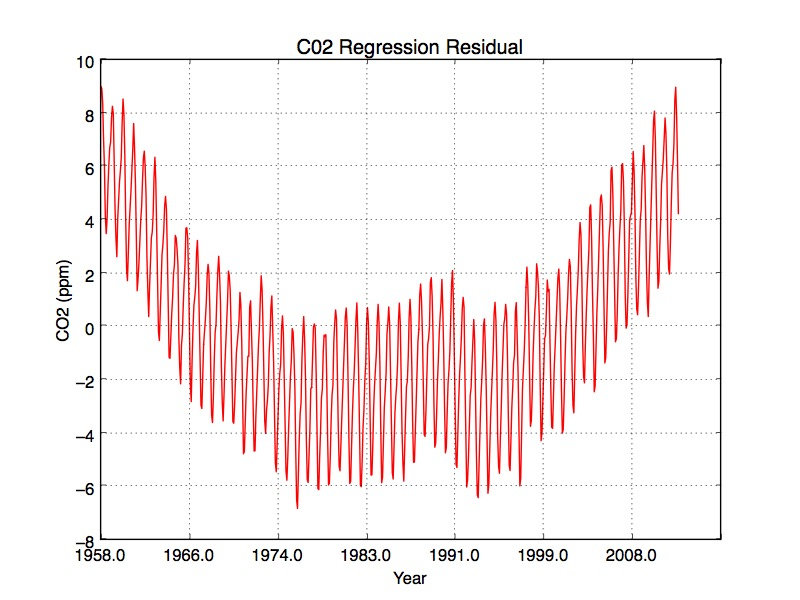

In [6]:
residual1 = co2[:,3] - prediction1
plt.figure()
plt.plot(residual1,'r')
plt.xticks(np.arange(0,701,100),co2[::100,0])
plt.title('C02 Regression Residual')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../figures/co2_residual.jpg')
plt.close()
image = disp.Image('../figures/co2_residual.jpg')
disp.display(image)


You can see that we're left with a parabola, and sine/cose wave.  To capture the parabola, let's include a parabolic predictor, such as time^2.

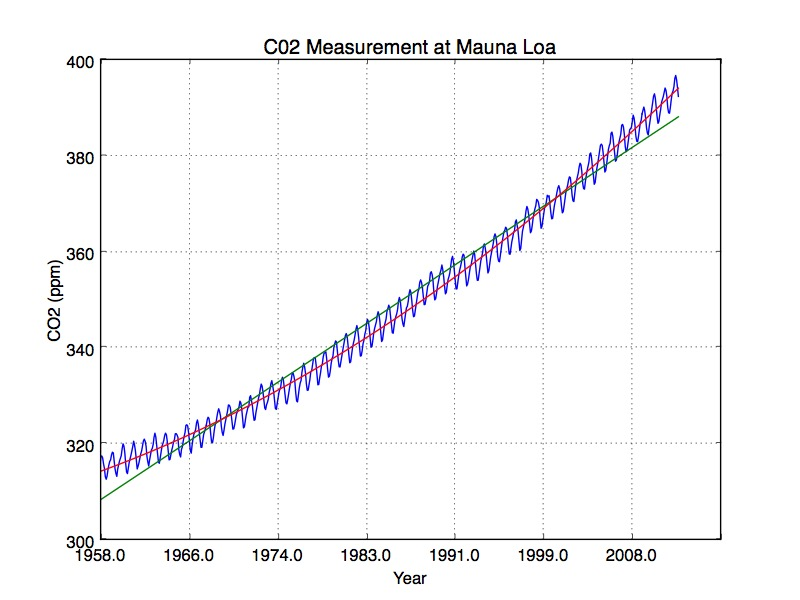

In [7]:
X = np.array((np.ones(len(co2)),timeVector,timeVector**2)).T
Y = co2[:,3].T
coeffs = np.linalg.lstsq(X,Y)[0] 
prediction2 = np.dot(X,coeffs)
plt.figure()
plt.plot(co2[:,3])
plt.plot(prediction1,'green')
plt.plot(prediction2,'r')
plt.xticks(np.arange(0,701,100),co2[::100,0])
plt.title('C02 Measurement at Mauna Loa')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../figures/co2.jpg')
plt.close()
image = disp.Image('../figures/co2.jpg')
disp.display(image)

Exanmine the residual...

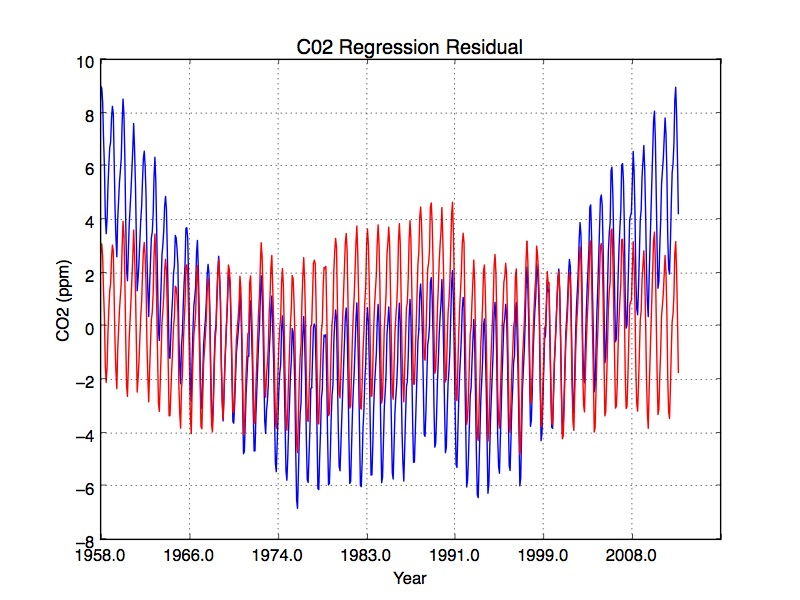

In [8]:
residual2 = co2[:,3] - prediction2
plt.figure()
plt.plot(residual1)
plt.plot(residual2,'r')
plt.xticks(np.arange(0,701,100),co2[::100,0])
plt.title('C02 Regression Residual')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../figures/co2_residual.jpg')
plt.close()
image = disp.Image('../figures/co2_residual.jpg')
disp.display(image)

Our residual is much better, what we still have to deal with the sine wave seasonal cycle!  To hand this, we can use sin and cos waves as a predictor to fit this portion of the dataset.

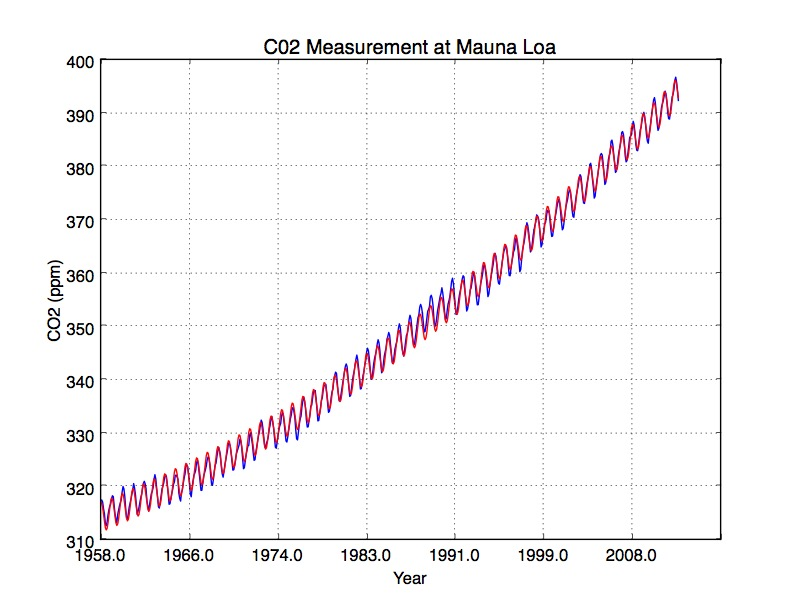

In [9]:
X = np.array((np.ones(len(co2)),
              timeVector,timeVector**2,
              np.sin((2 * np.pi * timeVector)/12),
              np.cos((2 * np.pi * timeVector)/12))).T
Y = co2[:,3].T
coeffs = np.linalg.lstsq(X,Y)[0] 
prediction3 = np.dot(X,coeffs)
plt.figure()
plt.plot(co2[:,3])
plt.plot(prediction3,'r')
plt.xticks(np.arange(0,701,100),co2[::100,0])
plt.title('C02 Measurement at Mauna Loa')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.grid(True)
plt.savefig('../figures/co2.jpg')
plt.close()
image = disp.Image('../figures/co2.jpg')
disp.display(image)